# Import and settings

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

# Processing

### cheng18

In [3]:
raw_ad = sc.read('cheng18.h5ad')

In [4]:
raw_ad

AnnData object with n_obs × n_vars = 92889 × 19831 
    var: 'gene_ids'

In [5]:
meta = pd.read_csv('meta.csv', index_col=0)

/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
meta.head()

,nGene,nUMI,orig.ident,percent.mito,sample,tissue,raw.reads,unmapped.reads,nonconf.reads,unmapped.pct,...,sampUMI,sampUMI.thresh,sampGene,sampGene.thresh,cluster,cluster.name,hlad.cluster,hlad.cluster.name,follicle.cluster,follicle.cluster.name
AAACCTGAGACTGTAA-1,3072,12009,aggr7,0.050212,fore8,foreskin,25917,3006,11750,0.073907,...,0.809440,0,0.751630,1,6,mitotic,NaN,NaN,NaN,NaN
AAACCTGCAAGGTTTC-1,2589,8383,aggr7,0.055715,fore8,foreskin,18781,2074,9660,0.067967,...,0.482530,1,0.502920,1,2,basal2,NaN,NaN,NaN,NaN
AAACCTGCATCTGGTA-1,2189,6135,aggr7,0.082165,fore8,foreskin,12707,1713,8784,0.073823,...,0.185158,1,0.238832,1,2,basal2,NaN,NaN,NaN,NaN
AAACCTGGTAGCGTCC-1,2772,10682,aggr7,0.047004,fore8,foreskin,23048,2413,10039,0.067972,...,0.733041,1,0.619027,1,6,mitotic,NaN,NaN,NaN,NaN
AAACCTGGTCTCTCTG-1,2331,7759,aggr7,0.051295,fore8,foreskin,15290,1678,7920,0.067422,...,0.394599,1,0.323455,1,2,basal2,NaN,NaN,NaN,NaN


In [7]:
raw_ad.obs = meta

In [181]:
raw_ad.obs.tissue.value_counts()

foreskin     26174
trunk        25129
psoriasis    21025
scalp        20561
Name: tissue, dtype: int64

In [117]:
raw_ad1 = raw_ad[raw_ad.obs.tissue != 'psoriasis', :].copy()

In [124]:
raw_ad1

AnnData object with n_obs × n_vars = 71864 × 19831 
    obs: 'sample', 'tissue', 'cluster.name', 'hlad.cluster.name', 'follicle.cluster.name'
    var: 'gene_ids'

In [125]:
ss.lib.calculate_qc(raw_ad1)

... storing 'sample' as categorical
... storing 'tissue' as categorical
... storing 'cluster.name' as categorical
... storing 'hlad.cluster.name' as categorical
... storing 'follicle.cluster.name' as categorical


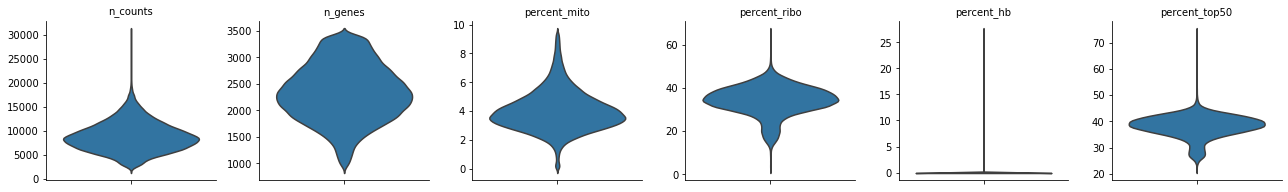

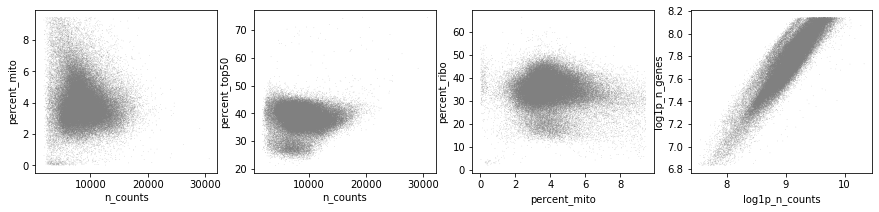

In [126]:
ss.lib.plot_qc(raw_ad1)

In [127]:
raw_ad1.obs['sample'].value_counts()

abd4       12116
fore12     10757
scalp32    10126
scalp26     8054
fore8       8030
fore9       7387
br41epi     7104
br53epi     5909
s11         2381
Name: sample, dtype: int64

In [129]:
ad1 = ss.lib.simple_default_pipeline(raw_ad1, batch='sample', filter_kw={'metrics': ['n_counts', 'percent_ribo', 'percent_hb']})

/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda/envs/scrna/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


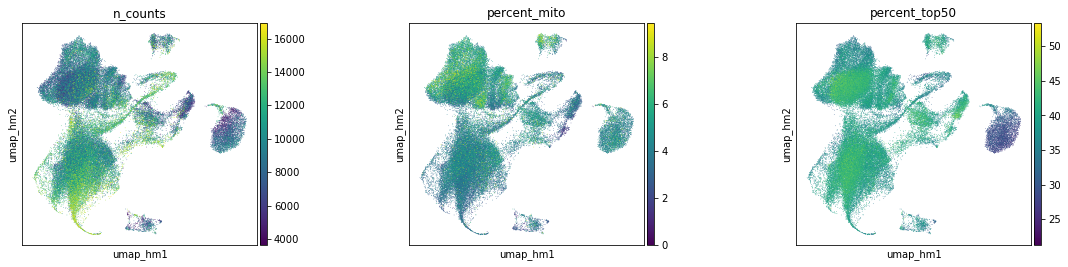

In [131]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_scatter(ad1, basis='umap_hm', color=['n_counts', 'percent_mito', 'percent_top50'], wspace=0.5)

In [134]:
ad1.obs['CellType'] = ad1.obs['cluster.name']

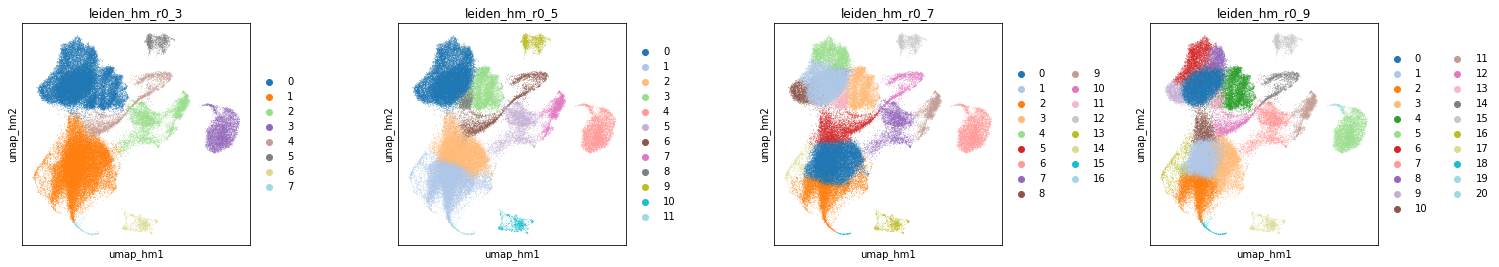

In [137]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_scatter(
    ad1, basis='umap_hm', wspace=0.5, palette='tab20', color_map=expr_cmap,
    color=['leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9'])

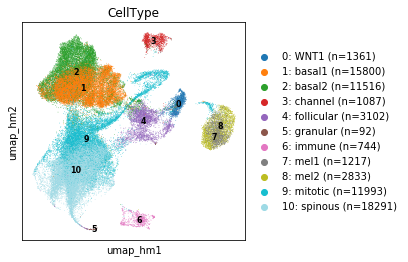

In [164]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_embedding(ad1, basis='umap_hm', groupby='CellType', palette='tab20')

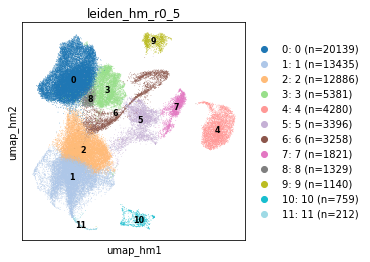

In [148]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_embedding(ad1, basis='umap_hm', groupby='leiden_hm_r0_5', palette='tab20')

In [173]:
ss.lib.cross_table(ad1, 'CellType', 'leiden_hm_r0_5', highlight=1)

leiden_hm_r0_5,0,1,2,3,4,5,6,7,8,9,10,11
CellType,,,,,,,,,,,,
WNT1,0,0,0,0,0,16,1,1344,0,0,0,0
basal1,10049,3,84,4389,6,31,11,18,1205,4,0,0
basal2,9746,8,179,852,1,361,169,58,121,20,1,0
channel,0,0,0,0,0,6,1,8,0,1072,0,0
follicular,9,10,5,0,0,2651,35,358,0,10,0,24
granular,0,2,0,0,0,17,0,0,0,6,0,67
immune,0,0,0,0,0,0,0,0,0,0,744,0
mel1,0,0,0,0,1216,0,0,1,0,0,0,0
mel2,0,0,0,0,2832,0,0,0,0,0,1,0


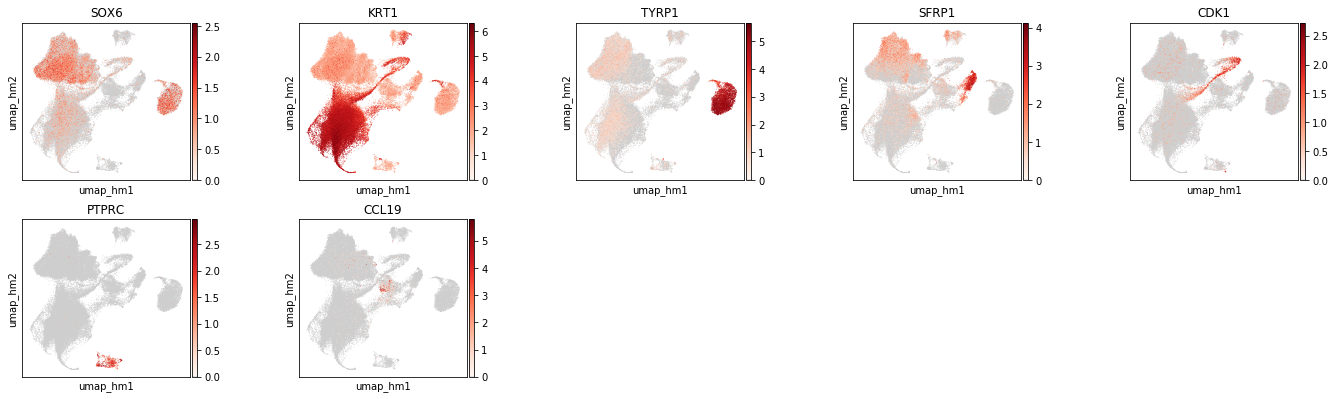

In [168]:
ss.lib.set_figsize((3, 3))
ss.lib.plot_scatter(
    ad1, basis='umap_hm', wspace=0.5, palette='tab20', color_map=expr_cmap, ncols=5,
    color=['SOX6', 'KRT1', 'TYRP1', 'SFRP1', 'CDK1', 'PTPRC', 'CCL19'])

In [175]:
ad1.obs['Re-annotation'] = ss.lib.regroup(ad1, groupby='leiden_hm_r0_5', regroups={
    'basal1': ['3', '8'],
    'basal2': ['0'],
    'spinous': ['1', '2'],
    'mitotic': ['6'],
    'granular': ['11'],
    'folicular': ['5'],
    'channel': ['9'],
    'WNT1': ['7'],
    'melanocyte': ['4'],
    'immune': ['10'],
})

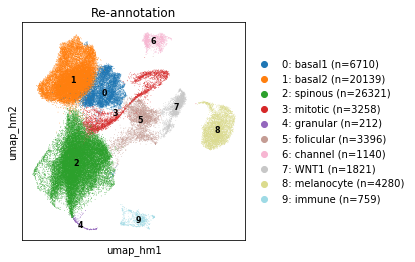

In [176]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_embedding(ad1, basis='umap_hm', groupby='Re-annotation', palette='tab20')

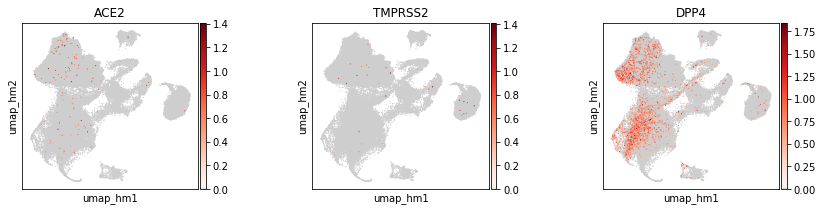

In [193]:
ss.lib.set_figsize((3, 3))
ss.lib.plot_scatter(
    ad1, basis='umap_hm', wspace=0.5, palette='tab20', color_map=expr_cmap, ncols=5, size=5, color=['ACE2', 'TMPRSS2', 'DPP4'])

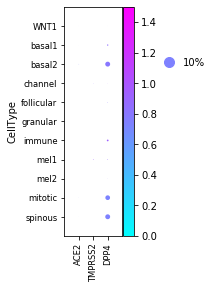

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.0499999999999998, 0, 0.2, 0.5, 0.25])

In [192]:
sc.pl.dotplot(ad1, ['ACE2', 'TMPRSS2', 'DPP4'], groupby='CellType', vmax=1.5, dot_max=0.1, mean_only_expressed=True, color_map='cool')